<a href="https://colab.research.google.com/github/shizacharania/Brain-Tumour-Grading/blob/main/TumourGrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import files
# files.upload()

In [2]:
!gdown --id 1OLCl6_OrEPl7vyzFekK6dCDPhl53QghX

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1OLCl6_OrEPl7vyzFekK6dCDPhl53QghX
To: /content/brain_tumour_grading_data_small.zip
100% 24.2M/24.2M [00:00<00:00, 82.3MB/s]


In [3]:
!unzip /content/brain_tumour_grading_data_small.zip

Archive:  /content/brain_tumour_grading_data_small.zip
   creating: brain_tumour_grading_data_small/
  inflating: __MACOSX/._brain_tumour_grading_data_small  
  inflating: brain_tumour_grading_data_small/.DS_Store  
  inflating: __MACOSX/brain_tumour_grading_data_small/._.DS_Store  
   creating: brain_tumour_grading_data_small/grade3/
   creating: brain_tumour_grading_data_small/grade4/
   creating: brain_tumour_grading_data_small/grade2/
  inflating: brain_tumour_grading_data_small/grade3/5.000000-AXIAL_T1_PRE_GD-61134_AXIAL_T1_PRE_GD_5_brain.nii  
  inflating: __MACOSX/brain_tumour_grading_data_small/grade3/._5.000000-AXIAL_T1_PRE_GD-61134_AXIAL_T1_PRE_GD_5_brain.nii  
  inflating: brain_tumour_grading_data_small/grade3/5.000000-AXIAL_T1_PRE_GD-85690_AXIAL_T1_PRE_GD_5_brain.nii  
  inflating: __MACOSX/brain_tumour_grading_data_small/grade3/._5.000000-AXIAL_T1_PRE_GD-85690_AXIAL_T1_PRE_GD_5_brain.nii  
  inflating: brain_tumour_grading_data_small/grade3/5.000000-AXIAL_T1_PRE-GAD.-5576

In [4]:
# getting the file paths for gr2 images, gr3 images, and gr4 images - examples:
# grade 2: /content/brain_tumour_grading_data_small/grade2/1.000000-AXIAL_T1_POST_GD-55708_AXIAL_T1_POST_GD_1_brain.nii
# grade 3: /content/brain_tumour_grading_data_small/grade3/2.000000-AXIAL_T2-79698_AXIAL_T2_2_e1_brain.nii
# grade 4: /content/brain_tumour_grading_data_small/grade4/1.000000-AXIAL_T1_POST_GD-81414_AXIAL_T1_POST_GD_1_brain.nii

In [5]:
import os

grade2_rootpath = "/content/brain_tumour_grading_data_small/grade2"
grade3_rootpath = "/content/brain_tumour_grading_data_small/grade3"
grade4_rootpath = "/content/brain_tumour_grading_data_small/grade4"

grade2_filepaths = os.listdir(grade2_rootpath)
grade3_filepaths = os.listdir(grade3_rootpath)
grade4_filepaths = os.listdir(grade4_rootpath)

grade2_filepaths.remove('.DS_Store')
grade3_filepaths.remove('.DS_Store')
grade4_filepaths.remove('.DS_Store')

print("There are " + str(len(grade2_filepaths)) + " grade 2 files")
print(grade2_filepaths)
print("There are " + str(len(grade3_filepaths)) + " grade 3 files")
print(grade3_filepaths)
print("There are " + str(len(grade4_filepaths)) + " grade 4 files")
print(grade4_filepaths)

There are 10 grade 2 files
['5.000000-AXIAL_T1_PRE_GD-04080_AXIAL_T1_PRE_GD_5_brain.nii', '1.000000-AXIAL_T1_POST_GD-70447_AXIAL_T1_POST_GD_1_brain.nii', '5.000000-AXIAL_T1_PRE_GD-06516_AXIAL_T1_PRE_GD_5_brain.nii', '5.000000-AXIAL_T1_PRE_GD-00202_AXIAL_T1_PRE_GD_5_brain.nii', '2.000000-AXIAL_VARIABLE_ECHO_PDT2-74529_AXIAL_VARIABLE_ECHO_PD_T2_2_e1_brain.nii', '5.000000-AXIAL_T1_POST_GAD.-46431_AXIAL_T1_POST_GAD._5_brain.nii', '2.000000-AXIAL_VARIABLE_ECHO_PDT2-74529_AXIAL_VARIABLE_ECHO_PD_T2_2_e2_brain.nii', '1.000000-AXIAL_T1_POST_GD-55708_AXIAL_T1_POST_GD_1_brain.nii', '5.000000-AXIAL_T1_PRE_GD-09302_AXIAL_T1_PRE_GD_5_brain.nii', '4.000000-AXIAL_T1-45172_AXIAL_T1_4_brain.nii']
There are 10 grade 3 files
['6.000000-AXIAL_T1_PRE_GD-25584_AXIAL_T1_PRE_GD_6_brain.nii', '2.000000-AXIAL_T2-79698_AXIAL_T2_2_e1_brain.nii', '5.000000-AXIAL_T1_PRE-GAD.-55766_AXIAL_T1_PRE-GAD._5_brain.nii', '5.000000-axial_t1_pre_gd-70698_axial_t1_pre_gd_5_brain.nii', '2.000000-AXIAL_T2-79698_AXIAL_T2_2_e2_brai

In [6]:
filepaths = []
labels = []

for afilepath in grade2_filepaths:
  filepaths.append(grade2_rootpath + "/" + afilepath)
  labels.append("grade 2")

for afilepath in grade3_filepaths:
  filepaths.append(grade3_rootpath + "/" + afilepath)
  labels.append("grade 3")

for afilepath in grade4_filepaths:
  filepaths.append(grade4_rootpath + "/" + afilepath)
  labels.append("grade 4")

In [7]:
print(filepaths)
print(labels)

print("There are " + str(len(filepaths)) + " files and " + str(len(labels)) + " labels in total.")
print(len(filepaths) == len(labels))

['/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_PRE_GD-04080_AXIAL_T1_PRE_GD_5_brain.nii', '/content/brain_tumour_grading_data_small/grade2/1.000000-AXIAL_T1_POST_GD-70447_AXIAL_T1_POST_GD_1_brain.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_PRE_GD-06516_AXIAL_T1_PRE_GD_5_brain.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_PRE_GD-00202_AXIAL_T1_PRE_GD_5_brain.nii', '/content/brain_tumour_grading_data_small/grade2/2.000000-AXIAL_VARIABLE_ECHO_PDT2-74529_AXIAL_VARIABLE_ECHO_PD_T2_2_e1_brain.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_POST_GAD.-46431_AXIAL_T1_POST_GAD._5_brain.nii', '/content/brain_tumour_grading_data_small/grade2/2.000000-AXIAL_VARIABLE_ECHO_PDT2-74529_AXIAL_VARIABLE_ECHO_PD_T2_2_e2_brain.nii', '/content/brain_tumour_grading_data_small/grade2/1.000000-AXIAL_T1_POST_GD-55708_AXIAL_T1_POST_GD_1_brain.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T

In [8]:
print(filepaths[0])
print(filepaths[28])

/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_PRE_GD-04080_AXIAL_T1_PRE_GD_5_brain.nii
/content/brain_tumour_grading_data_small/grade4/4.000000-AXIAL_T2-97482_AXIAL_T2_4_e1_brain.nii


In [9]:
"""
my approach to visualize 3d images:
- use simpleitk (sitk)
   - i need to load the images into sitk format and then convert it into a numpy array

- from a numpy array, i need to do 2 tasks
    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices

look into basics of simpleitk - how to read the file and then convert it into np.array()
look into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio
look into what fatemeh did: https://youtu.be/rBIetBho0x4
"""

'\nmy approach to visualize 3d images:\n- use simpleitk (sitk)\n   - i need to load the images into sitk format and then convert it into a numpy array\n\n- from a numpy array, i need to do 2 tasks\n    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that\n    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices\n\nlook into basics of simpleitk - how to read the file and then convert it into np.array()\nlook into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio\nlook into what fatemeh did: https://youtu.be/rBIetBho0x4\n'

In [10]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 20 kB/s 


In [11]:
import SimpleITK as sitk

In [35]:
img_nparrays = []

for filepath in filepaths:
  img = sitk.ReadImage(filepath) # returns a <class 'SimpleITK.SimpleITK.Image'>
  img = sitk.GetArrayFromImage(img)
  img_nparrays.append(img)
print(len(img_nparrays))
print(len(labels))

30
30


(30, 256, 256)
<class 'numpy.ndarray'>


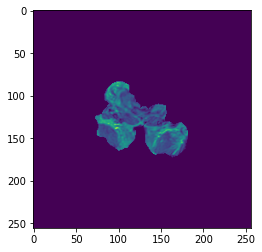

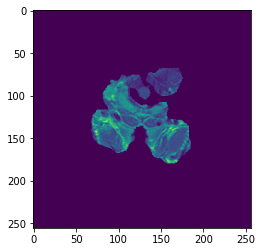

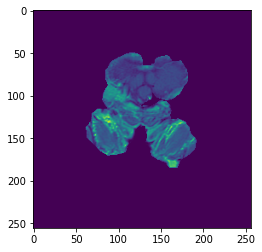

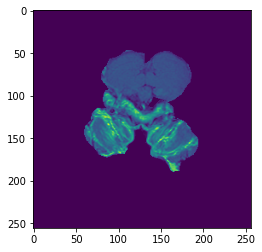

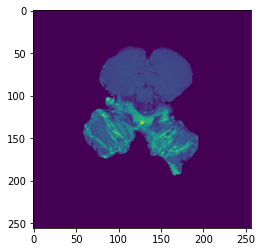

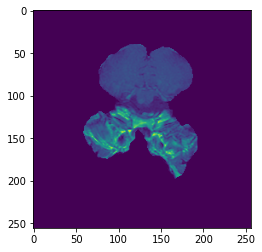

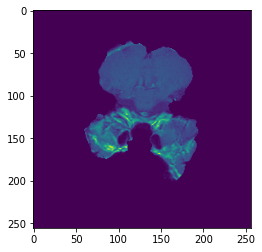

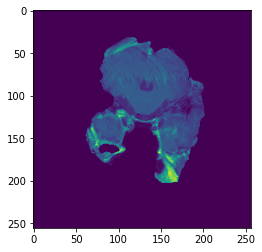

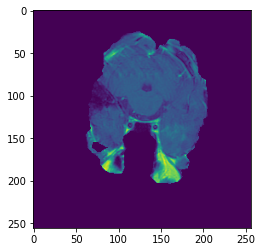

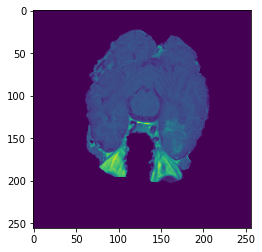

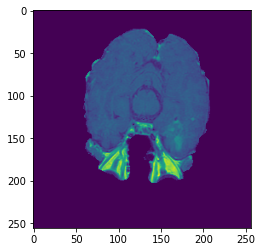

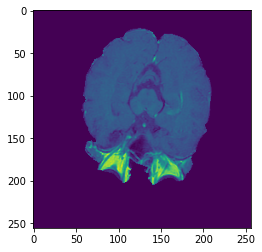

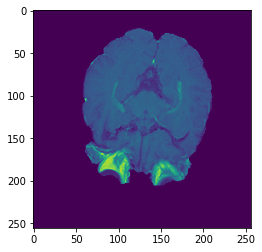

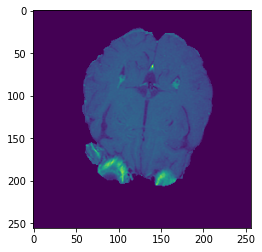

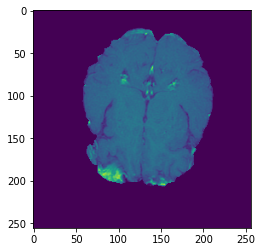

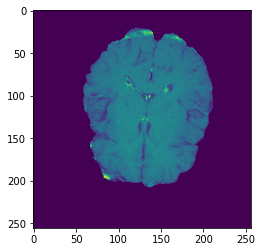

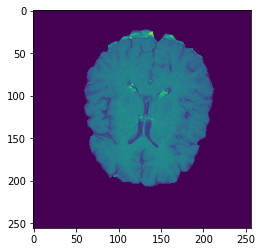

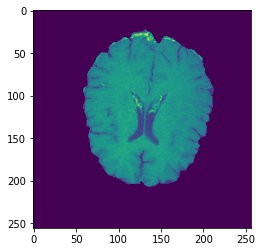

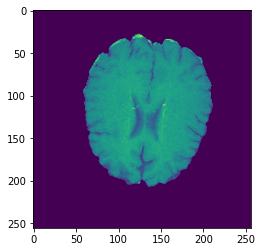

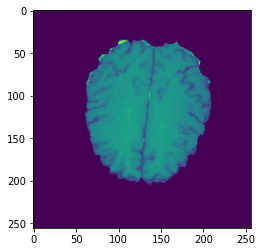

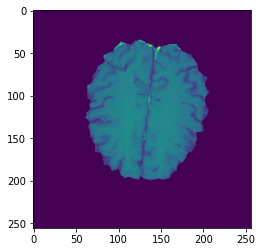

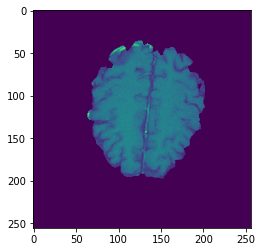

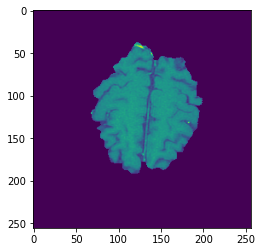

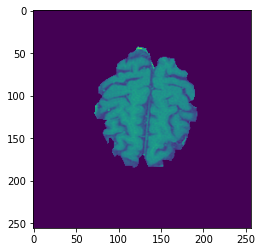

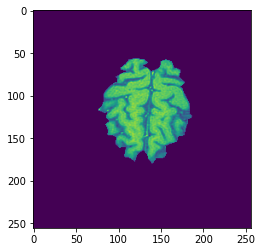

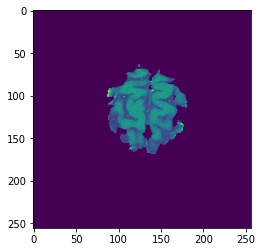

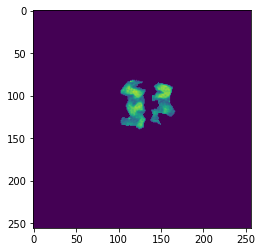

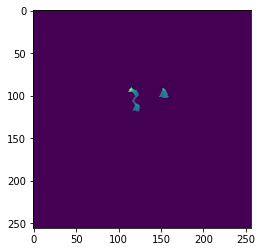

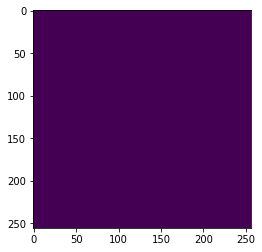

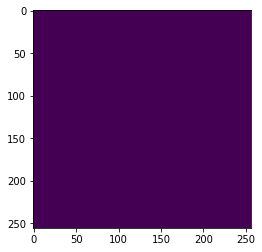

grade 2


In [37]:
# 1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
import matplotlib.pyplot as plt
import numpy as np

testing_img = img_nparrays[5]
print(testing_img.shape)
print(type(testing_img))

# print(testing_img[:, :, :])

for i in range(testing_img.shape[0]):
  brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()
print(labels[0])

# print(testing_img[2, :, :].shape)

In [14]:
count = 0
min_slices = img_nparrays[0].shape[0]  # ig you would have to find the fewest amount of slices and then resize it that way

for i in range(len(img_nparrays)):
  img = img_nparrays[i]
  if (img.shape[0] == 3):
    print("HI")
    continue
  print((img_nparrays[i].shape))
  if (img_nparrays[i].shape[0] < min_slices and img.shape[0] != 3):
    min_slices = img_nparrays[i].shape[0];
  count += 1

print(count)
print(min_slices)

(58, 256, 256)
(58, 256, 256)
(60, 256, 256)
(58, 256, 256)
(21, 256, 256)
(30, 256, 256)
(21, 256, 256)
(56, 256, 256)
(57, 256, 256)
(56, 256, 256)
(49, 256, 256)
(21, 256, 256)
(58, 256, 256)
(55, 256, 256)
(21, 256, 256)
(30, 256, 256)
(57, 256, 256)
(64, 256, 256)
(49, 256, 256)
(54, 256, 256)
(30, 256, 256)
(20, 256, 256)
(55, 256, 256)
(23, 256, 256)
(20, 256, 256)
(30, 256, 256)
(32, 256, 256)
(58, 256, 256)
(20, 256, 256)
(20, 256, 256)
30
20


In [15]:
# no slicing through cropping - need to resize volumes

# same_size_arrays = []

# for i in range(len(img_nparrays)):
#   img = img_nparrays[i]
#   if (img.shape[0] == 3):
#     continue
#   print(img.shape)
#   brain_slice = img[:min_slices, :, :]
#   print(brain_slice.shape)
#   print()
#   same_size_arrays.append(brain_slice)

In [16]:
# print(len(same_size_arrays))

In [17]:
# testing_img = same_size_arrays[4]
# print(testing_img.shape)
# print(type(testing_img))

# # print(testing_img[:, :, :])

# for i in range(testing_img.shape[0]):
#   brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
#   plt.imshow(brain_slice)
#   plt.show()
#   plt.close()

In [18]:
# # i took out slices from the ends of the images because I thought/assumed that in the images, the first and last slices of only have sparse information
# #  that's the problem - I ASSUMED, so after making the algorithm, I realized that I shouldn’t have sliced the ends.
# # instead, the last slices are the ones that have sparse information. on the other hand, the first few slices have a lot of information
# # so now i gotta slice out from the last ones

# same_size_arrays2 = []

# for i in range(len(img_nparrays)):
#   img = img_nparrays[i]
#   # print(img.shape)

#   if (img.shape[0] == 3):
#     continue

#   take_out = (img.shape[0]-min_slices)/2;
#   # print(img.shape[0])
#   # print(take_out)
#   if (take_out % 1 == 0):
#     # print("yes")
#     start = int(take_out)
#     end = int(img.shape[0]-take_out)
#     print(start, end)
#   if (take_out % 1 != 0):
#     # print("no")
#     start = int(take_out)
#     end = int(img.shape[0]-take_out)
#     print(start, end)

#   brain_slice = img[start:end, :, :]
#   print(brain_slice.shape)
#   same_size_arrays2.append(brain_slice)
# #   print("\nNEXT\n")
#   # print(img_nparrays[i].shape[0], start, end)

# # print(testing_img[10, 180, 175:181])
#   # print(brain_slice.shape)



In [19]:
# print(len(same_size_arrays2[0]))

In [20]:
# testing_img = same_size_arrays2[4]
# print(testing_img.shape)
# print(type(testing_img))

# # print(testing_img[:, :, :])

# for i in range(testing_img.shape[0]):
#   brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
#   plt.imshow(brain_slice)
#   plt.show()
#   plt.close()

In [21]:
# for one:
# img = img_nparrays[1]
# print(img.shape)

# take_out = (img.shape[0]-min_slices)/2;
# print(img.shape[0])
# print(take_out)
# if (take_out % 1 == 0):
#   # print("yes")
#   start = int(take_out)
#   end = int(img.shape[0]-take_out)
#   print(start, end)
# if (take_out % 1 != 0):
#   # print("no")
#   start = int(take_out)
#   end = int(img.shape[0]-take_out)
#   print(start, end)

# brain_slice = img[start:end, :, :]
# print(brain_slice.shape)
# #   print("\nNEXT\n")
#   # print(img_nparrays[i].shape[0], start, end)

# # print(testing_img[10, 180, 175:181])
#   # print(brain_slice.shape)


In [22]:
def find_scale(size):
  return 20/size

In [23]:
from scipy.ndimage import zoom
same_size_arrays = []

for i in range(len(img_nparrays)):
  img = img_nparrays[i]

  if (img.shape[0] == 3):
    continue

  new_array = zoom(img, (find_scale(img.shape[0]), 1, 1))
  same_size_arrays.append(new_array)
  print(new_array.shape)

(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)
(20, 256, 256)


(20, 256, 256)
<class 'numpy.ndarray'>


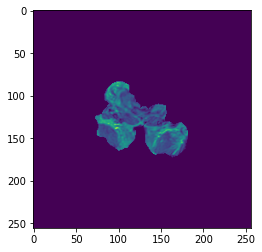

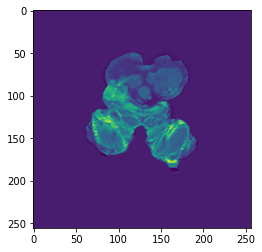

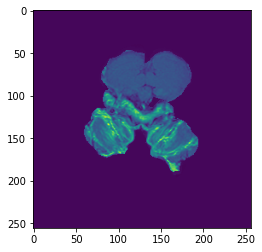

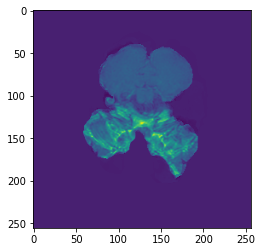

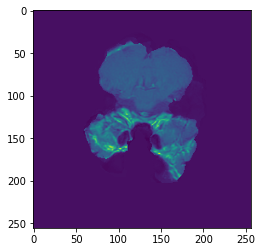

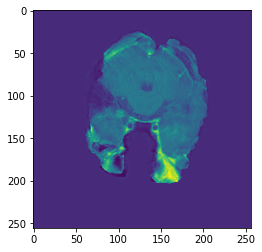

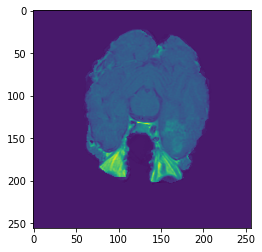

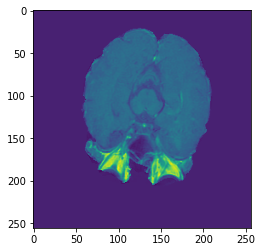

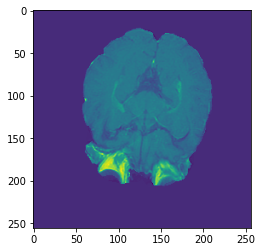

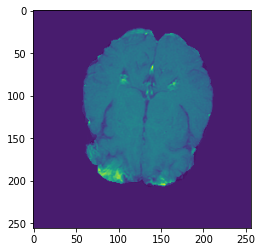

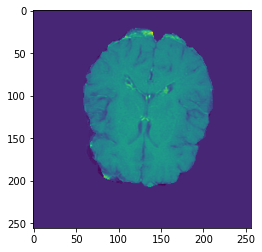

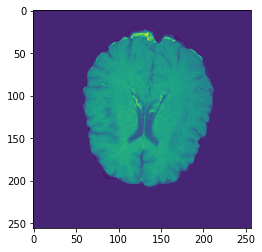

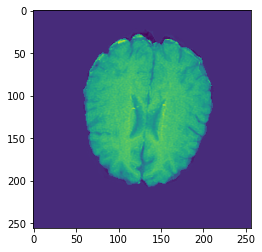

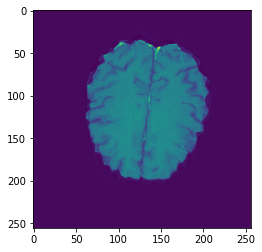

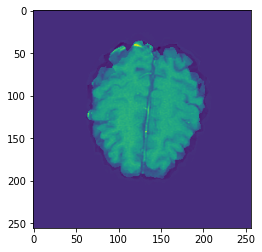

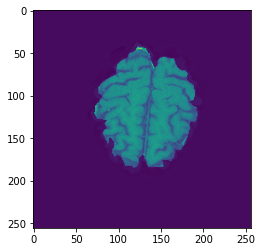

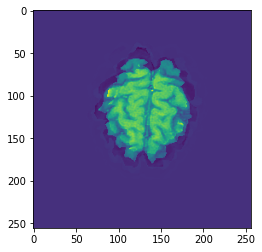

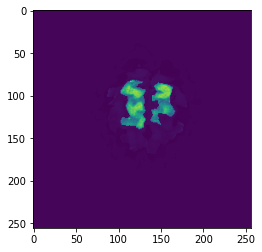

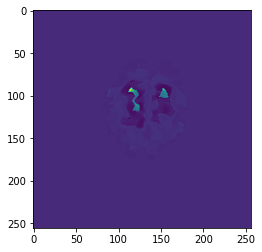

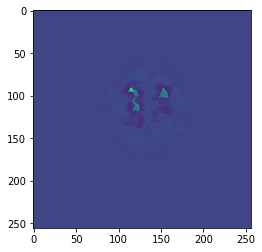

In [24]:
testing_img = same_size_arrays[5]
print(testing_img.shape)
print(type(testing_img))

# print(testing_img[:, :, :])

for i in range(testing_img.shape[0]):
  brain_slice = testing_img[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()

In [25]:
"""
size is not the same :(

find mean and standard deviation on the entire volume of one image - do we need size to be same for this?
^yes, but why?
 I should be taking the mean and standard deviation for each volume as a whole and then
 averaging that instead of taking it for each slice of each volume. Also, for normalization,
 the image size should be the same for all the scans with different volumes (which will also tie
into other preprocessing steps). Normalization is one part of preprocessing though

convert the array into a torch tensor
convert all pixel values into float32
make pixel value range from 0 to 1

if needed, volume reshaping (ndimage.zoom (resize first and then normalize))
create a new dataset with the preprocessed images

even if preprocessing works out well, you can't train a model based on images with different dimensions
"""

"\nsize is not the same :(\n\nfind mean and standard deviation on the entire volume of one image - do we need size to be same for this?\n^yes, but why?\n I should be taking the mean and standard deviation for each volume as a whole and then\n averaging that instead of taking it for each slice of each volume. Also, for normalization,\n the image size should be the same for all the scans with different volumes (which will also tie\ninto other preprocessing steps). Normalization is one part of preprocessing though\n\nconvert the array into a torch tensor\nconvert all pixel values into float32\nmake pixel value range from 0 to 1\n\nif needed, volume reshaping (ndimage.zoom (resize first and then normalize))\ncreate a new dataset with the preprocessed images\n\neven if preprocessing works out well, you can't train a model based on images with different dimensions\n"

In [26]:
def find_mean(volume):
  total_pixels = 256*256*20
  pixels_sum = 0
  # print(volume.shape)
  for i in range(20):
    current_slice = volume[i, :, :] # got the current slice
    current_slice_sum = current_slice.sum() # take sum of each slice
    # print(current_sum/256/256)
    pixels_sum += current_slice_sum # add the sum of all the slices
  # print(pixels_sum, total_pixels)
  return pixels_sum/total_pixels

In [27]:
print(find_mean(same_size_arrays[2]))
print(np.mean(same_size_arrays[2]))

40.82076508157297
40.82076


In [28]:
total_mean = 0
for i in same_size_arrays:
  total_mean += find_mean(i)
mean = total_mean/len(same_size_arrays)
print(mean)
print(np.mean(same_size_arrays))

65.24777874948757
65.24787


In [29]:
import math

def find_std(volume):
  total_pixels = 256*256*20
  squared_sum_error = 0
  # print(volume.shape)
  for i in range(20):
    current_slice = volume[i, :, :] # got the current slice
    squared_sum_error += ((current_slice-mean)**2).sum()
  return math.sqrt(squared_sum_error/total_pixels)

In [30]:
print(find_std(same_size_arrays[5]))
print(np.std(same_size_arrays[5]))

109.5696670546943
108.672295


In [31]:
total_std = 0
for i in same_size_arrays:
  total_std += find_std(i)
std = total_std/len(same_size_arrays)
print(std)
print(np.std(same_size_arrays))

136.49344329419276
148.11916


In [32]:
print("Mean: " + str(mean) + " ----- " + "Standard Deviation: " + str(std))

Mean: 65.24777874948757 ----- Standard Deviation: 136.49344329419276


In [33]:
# https://pytorch.org/vision/stable/transforms.html

# convert the numpy array into a torch tensor + make pixel value range from 0 to 1
  # Numpy arrays are mainly used in typical machine learning algorithms (such as k-means or Decision Tree in scikit-learn)
  # whereas pytorch tensors are mainly used in deep learning which requires heavy matrix computation.
  # also you can easily appply transforms and normalize through the torch package
  # ToTensor() - It converts the PIL image with a pixel range of [0, 255] to a PyTorch FloatTensor of shape (C, H, W) with a range [0.0, 1.0]
  # https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor
# convert all pixel values into float32
  # ConvertImageDtype(torch.float)
  # https://pytorch.org/vision/stable/generated/torchvision.transforms.ConvertImageDtype.html#torchvision.transforms.ConvertImageDtype
# normalize
  # Normalize()
  # https://pytorch.org/vision/stable/generated/torchvision.transforms.Normalize.html#torchvision.transforms.Normalize

# ^i can do this for every slice since it doesn't make a difference to the values (since ur changing individual pixels)

In [34]:
# trying out difference between numpy array and torch tensor

# print(same_size_arrays[0][0][0])
# import torch
# print(torch.tensor(same_size_arrays[0][0][0]))

In [42]:
import torch
import torchvision
import torchvision.transforms as transforms

In [339]:
image_data = []

for i in same_size_arrays:
  pass
  # if I wanted to, I could resize using cv2.resize()
  transform = transforms.Compose([transforms.ToTensor(),
                                  transforms.ConvertImageDtype(torch.float),
                                  transforms.Normalize(mean, std)]) # done in the same order as mentioned
  image = transform(i)
  image_data.append(image)

In [340]:
print(type(same_size_arrays[0][0][0]))
print(same_size_arrays[0][0][0])
print()
print(type(image_data[0][0][0]))
print(image_data[0][0][0])
# ^I want to confirm that the reason why these pixels in the torch tensor are negative and not in the range of [0,1] is because
# after making it into a tensor, you are normalizing through standardization/z-score normalization, which doesn't have a specified range, so
# it probably went a bit out of the [0,1] range
# https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/#:~:text=The%20ImageDataGenerator%20class%20can%20be,traditionally%20referred%20to%20as%20normalization.
# https://www.geeksforgeeks.org/normalization-vs-standardization/
# https://pytorch.org/vision/stable/generated/torchvision.transforms.Normalize.html#torchvision.transforms.Normalize

<class 'numpy.ndarray'>
[ 0.  0.  0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.
  0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0.  0.
 -0.  0.  0. -0. -0. -0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0.
  0. -0. -0.  0.  0.  0.  0. -0. -0.  0. -0.  0. -0.  0.  0.  0. -0.  0.
  0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0. -0.
 -0.  0. -0.  0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.  0.  0.
  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0. -0. -0.
  0.  0. -0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0. -0.  0. -0.
  0.  0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.
 -0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0.  0. -0. -0. -0.  0.  0.
  0. -0. -0.  0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.
  0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0. -0.  0.  0.  0

In [341]:
"""
Multi-Classification of Brain Tumor Images Using Deep Neural Network - best overall accuracy of 96.13% and 98.7%

Then, data is shuffled before splitting them to maintain the system to train on unsorted data and prevent focusing on a narrow band
of the entire dataset. Data is divided into three sections; training, validation, and test sets all with their individual target labels
(68% for training and 32% for system test and validation). Finally, we augment the images of study I so that the system can identify them as
new ones, and that is usually used to avoid overfitting and increase model robust- ness [20], [31].
"""

'\nMulti-Classification of Brain Tumor Images Using Deep Neural Network - best overall accuracy of 96.13% and 98.7%\n\nThen, data is shuffled before splitting them to maintain the system to train on unsorted data and prevent focusing on a narrow band\nof the entire dataset. Data is divided into three sections; training, validation, and test sets all with their individual target labels\n(68% for training and 32% for system test and validation). Finally, we augment the images of study I so that the system can identify them as\nnew ones, and that is usually used to avoid overfitting and increase model robust- ness [20], [31].\n'

In [342]:
"""
Multi-Classification of Brain Tumor MRI Images Using Deep Convolutional Neural Network with Fully Optimized Framework - 98.14%

"There are 2990 images for Classification-1 task,3950 images for Classification-2 task and 4570 images for Classification-3 task.
For each classification task, the dataset is randomly separated as training, validation and test sets having the ratio of 60:20:20."
"""

'\nMulti-Classification of Brain Tumor MRI Images Using Deep Convolutional Neural Network with Fully Optimized Framework - 98.14%\n\n"There are 2990 images for Classification-1 task,3950 images for Classification-2 task and 4570 images for Classification-3 task.\nFor each classification task, the dataset is randomly separated as training, validation and test sets having the ratio of 60:20:20."\n'

In [343]:
# I'm going to go with to go with the second paper's 60:20:20 split because it would also be easier given that I'm working with 20 images for now

In [344]:
len_images = len(image_data)
len_labels = len(labels)

print(len_images, len_labels)

30 30


In [345]:
image_label_data = list(zip(image_data, labels))
check_images = []
check_labels = []
for i in image_label_data:
  check_images.append(i[0])
  check_labels.append(i[1])
# print(check_images[0][0][10])

import random
shuffled_images = []
shuffled_labels = []
random.shuffle(image_label_data)
for i in image_label_data:
  shuffled_images.append(i[0])
  shuffled_labels.append(i[1])
# print(shuffled_images[0][0][10])

print(check_labels)
print(shuffled_labels)

# if the labels are shuffling, it is safe to assume that so are the images

['grade 2', 'grade 2', 'grade 2', 'grade 2', 'grade 2', 'grade 2', 'grade 2', 'grade 2', 'grade 2', 'grade 2', 'grade 3', 'grade 3', 'grade 3', 'grade 3', 'grade 3', 'grade 3', 'grade 3', 'grade 3', 'grade 3', 'grade 3', 'grade 4', 'grade 4', 'grade 4', 'grade 4', 'grade 4', 'grade 4', 'grade 4', 'grade 4', 'grade 4', 'grade 4']
['grade 3', 'grade 2', 'grade 4', 'grade 3', 'grade 3', 'grade 3', 'grade 3', 'grade 3', 'grade 2', 'grade 3', 'grade 4', 'grade 4', 'grade 4', 'grade 3', 'grade 4', 'grade 2', 'grade 2', 'grade 4', 'grade 4', 'grade 2', 'grade 4', 'grade 2', 'grade 2', 'grade 2', 'grade 4', 'grade 4', 'grade 3', 'grade 2', 'grade 2', 'grade 3']


In [346]:
v_t_datasize = int(len_images*0.2)
training_datasize = len_images - (v_t_datasize*2)
print(v_t_datasize, training_datasize)
print(v_t_datasize+v_t_datasize+training_datasize == 30)

6 18
True


In [273]:
def make_dataset(start_idx, end_idx):
  image_dataset = shuffled_images[start_idx:end_idx]
  label_dataset = shuffled_labels[start_idx:end_idx]
  return list(zip(image_dataset, label_dataset))

In [274]:
training_data = make_dataset(0, training_datasize)
validation_data = make_dataset(training_datasize, training_datasize+v_t_datasize)
testing_data = make_dataset(training_datasize+v_t_datasize, len_images)

In [275]:
print(len(training_data))
print(len(training_data[0]))
print()
print(len(validation_data))
print(len(validation_data[0]))
print()
print(len(testing_data))
print(len(testing_data[0]))
print()
print(len(training_data)+len(validation_data)+len(testing_data))

18
2

6
2

6
2

30


In [276]:
from torch import utils

trainloader = torch.utils.data.DataLoader(training_data, batch_size=1, shuffle = True) 
# ^batch size is 1 for now because we only have 30 images in total- only 18 for training

validationloader = torch.utils.data.DataLoader(validation_data, batch_size=1, shuffle = True) 

testloader = torch.utils.data.DataLoader(testing_data, batch_size=1, shuffle = True) 

torch.Size([20, 256, 256])
('grade 3',)


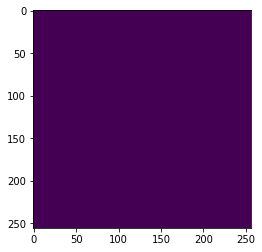

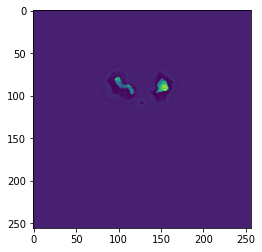

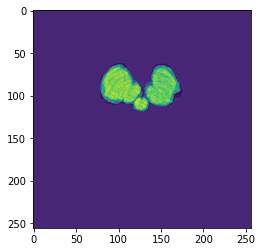

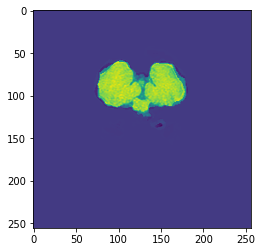

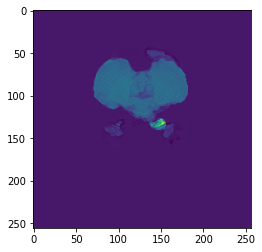

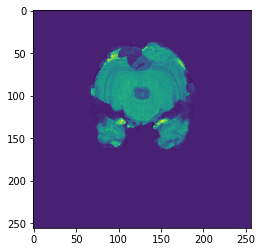

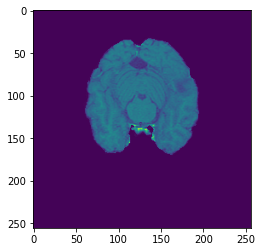

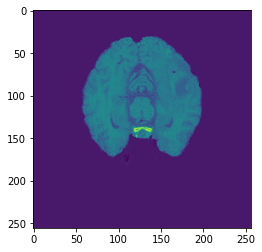

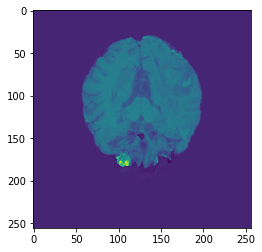

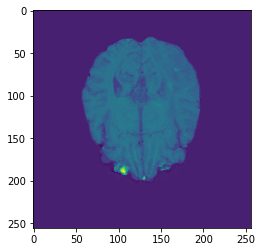

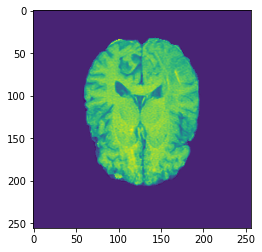

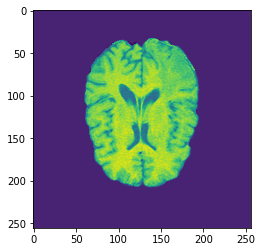

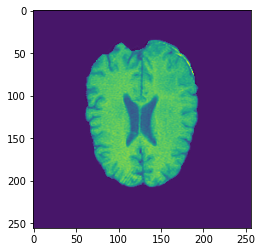

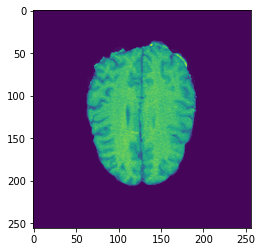

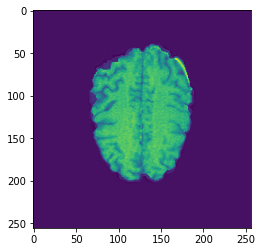

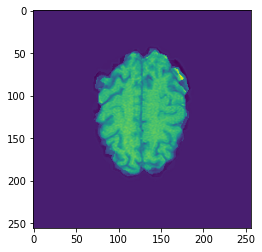

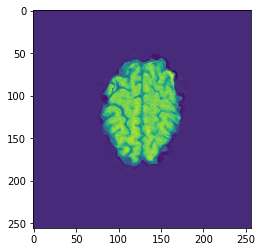

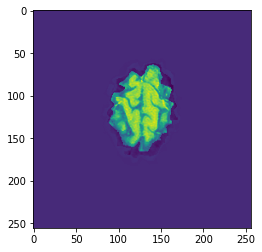

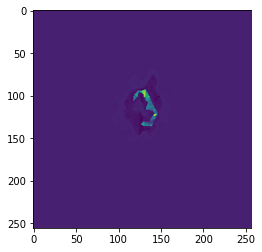

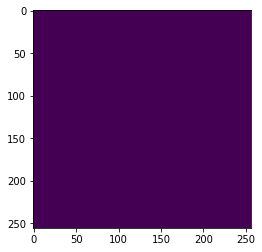

In [322]:
trimage, trlabel = next(iter(trainloader)) # every time you run this, it gives you new image and new label (since it also shuffles)

trimage = trimage.squeeze()
trimage = trimage.permute(1,2,0) # it should be (1,2,0) not (1,0,2) because the dimensions change when converting from numpy array to torch tensor

print(trimage.shape)
print(trlabel)

for i in range(trimage.shape[0]):
  brain_slice = trimage[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()

torch.Size([20, 256, 256])
('grade 2',)


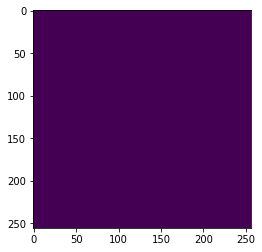

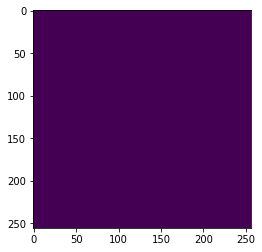

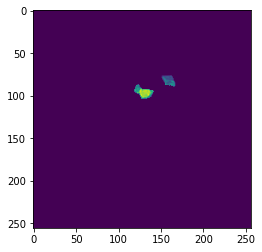

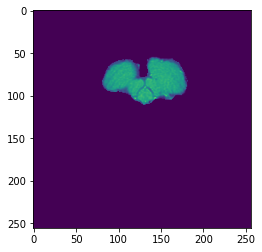

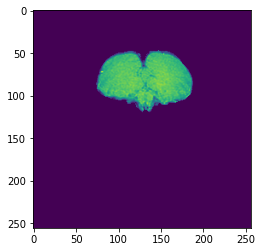

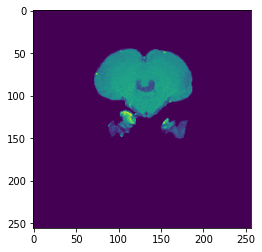

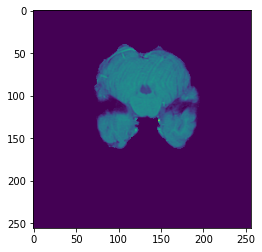

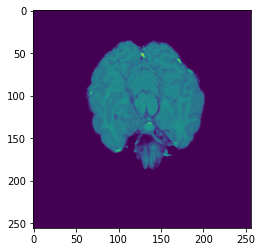

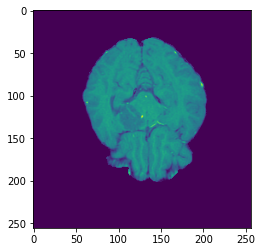

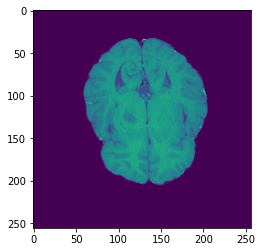

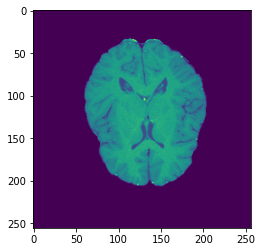

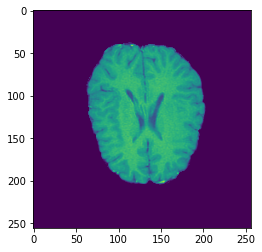

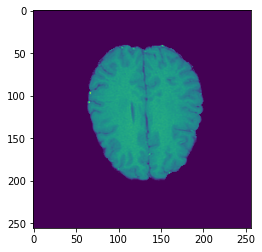

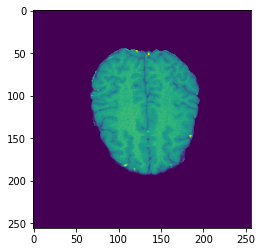

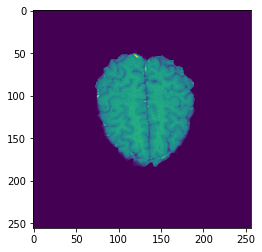

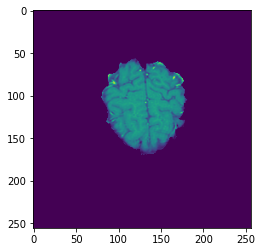

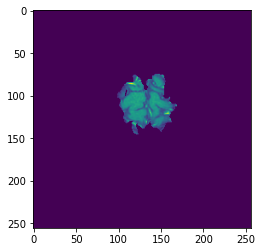

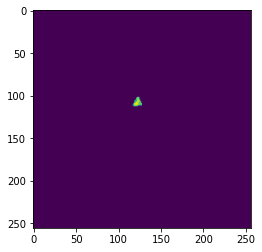

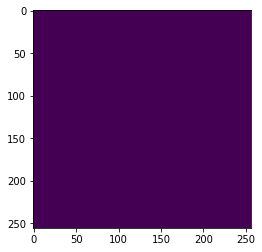

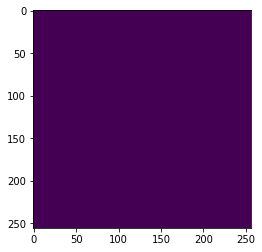

In [331]:
vimage, vlabel = next(iter(validationloader)) # every time you run this, it gives you new image and new label (since it also shuffles)

vimage = vimage.squeeze()
vimage = vimage.permute(1,2,0) # it should be (1,2,0) not (1,0,2) because the dimensions change when converting from numpy array to torch tensor

print(vimage.shape)
print(vlabel)

for i in range(vimage.shape[0]):
  brain_slice = vimage[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()

torch.Size([20, 256, 256])
('grade 3',)


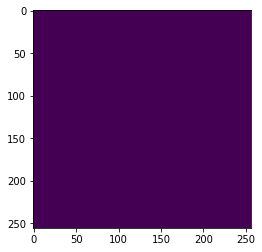

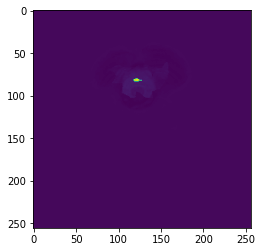

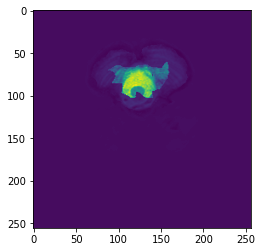

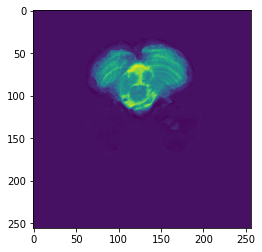

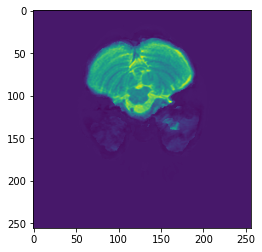

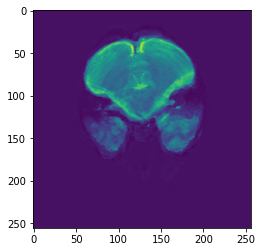

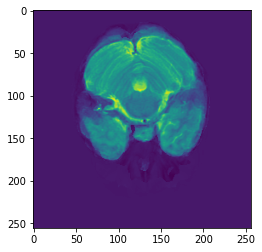

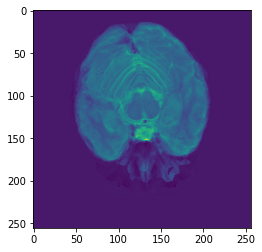

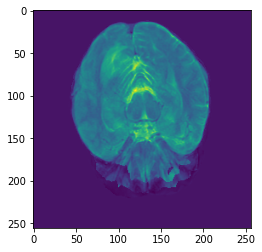

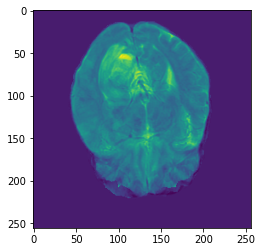

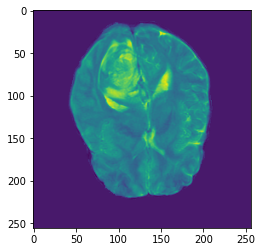

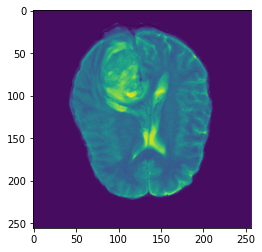

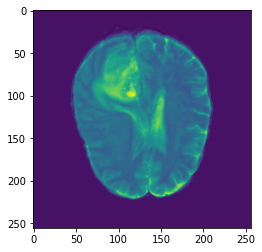

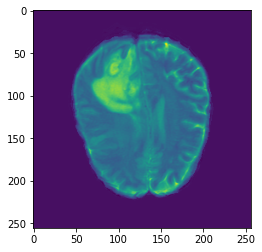

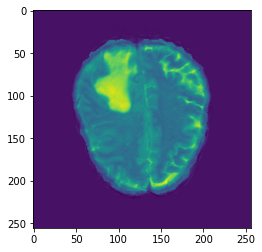

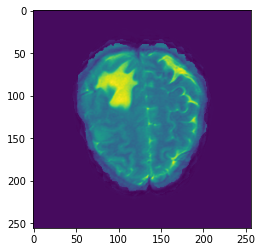

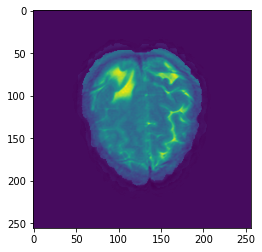

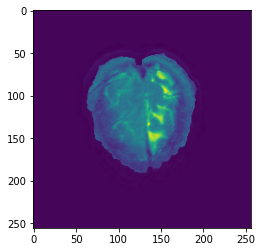

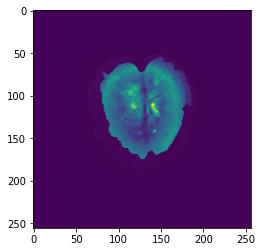

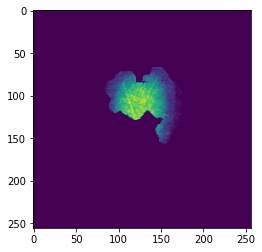

In [334]:
teimage, telabel = next(iter(testloader)) # every time you run this, it gives you new image and new label (since it also shuffles)

teimage = teimage.squeeze()
teimage = teimage.permute(1,2,0) # it should be (1,2,0) not (1,0,2) because the dimensions change when converting from numpy array to torch tensor

print(teimage.shape)
print(telabel)

for i in range(teimage.shape[0]):
  brain_slice = teimage[i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice)
  plt.show()
  plt.close()